In [1]:
from src import *
from verde_source import regular, interp_at

from tqdm import tqdm
from shapely.ops import transform
from pylab import *
from shapely.geometry import Point, Polygon

import verde as vd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import geopandas as gpd
import pyproj
import os

import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Construindo Quadrícula

In [2]:
# Listando arquivos de aerogefísica pré tratados
list_geof = os.listdir('/home/ggrl/database/geof/')
list_geof

['mag_line_1105',
 'mag_1039',
 'gama_line_1105',
 'mag_line_1089',
 'gama_1039',
 'mag_3022',
 'mag_1105',
 'mag_tie_1105',
 'gama_1039_mdt.csv',
 'gama_line_1089',
 'gama_3022',
 'gama_line_1092',
 'geof_1039']

In [3]:
quadricula = Build_mc(escala='50k',ID=['SF23_YA','SF23_YB_I', 'SF23_YB_IV'],verbose=True)

100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 148.58it/s]
56it [00:00, 10614.65it/s]


 - Folha "SF23_YA" adicionada.

 - Folha "SF23_YA_IV" adicionada.

 - Folha "SF23_YA_V" adicionada.

 - Folha "SF23_YA_VI" adicionada.

 - Folha "SF23_YA_I" adicionada.

 - Folha "SF23_YA_II" adicionada.

 - Folha "SF23_YA_III" adicionada.

 - Folha "SF23_YA_IV_3" adicionada.

 - Folha "SF23_YA_IV_4" adicionada.

 - Folha "SF23_YA_V_3" adicionada.

 - Folha "SF23_YA_V_4" adicionada.

 - Folha "SF23_YA_VI_3" adicionada.

 - Folha "SF23_YA_VI_4" adicionada.

 - Folha "SF23_YA_IV_1" adicionada.

 - Folha "SF23_YA_IV_2" adicionada.

 - Folha "SF23_YA_V_1" adicionada.

 - Folha "SF23_YA_V_2" adicionada.

 - Folha "SF23_YA_VI_1" adicionada.

 - Folha "SF23_YA_VI_2" adicionada.

 - Folha "SF23_YA_I_3" adicionada.

 - Folha "SF23_YA_I_4" adicionada.

 - Folha "SF23_YA_II_3" adicionada.

 - Folha "SF23_YA_II_4" adicionada.

 - Folha "SF23_YA_III_3" adicionada.

 - Folha "SF23_YA_III_4" adicionada.

 - Folha "SF23_YA_I_1" adicionada.

 - Folha "SF23_YA_I_2" adicionada.

 - Folha "SF23_YA_II_1" 

# Adicionando dados brutos à Quadrícula

In [4]:
#gama_3022,mag_3022=Upload_geof(quadricula,'gama_3022','mag_3022', 600)
gama_1105,mag_1105=Upload_geof(quadricula,'gama_line_1105','mag_line_1105',600)
#gama_1039,mag_1039=Upload_geof(quadricula,'gama_1039','mag_1039',1100)

  2%|█▌                                                                           | 1/51 [00:00<00:06,  7.72it/s]

 - gama_line_1105 atualizado na folha: SF23_YA com 41798 pontos
 - mag_line_1105 atualizado na folha: SF23_YA com 434618 pontos


  8%|██████                                                                       | 4/51 [00:00<00:04,  9.50it/s]

 - gama_line_1105 atualizado na folha: SF23_YA_VI com 44240 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_VI com 460271 pontos


 14%|██████████▌                                                                  | 7/51 [00:00<00:04,  9.42it/s]

 - gama_line_1105 atualizado na folha: SF23_YA_III com 83909 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_III com 872691 pontos


 29%|██████████████████████▎                                                     | 15/51 [00:01<00:03, 11.44it/s]

 - mag_line_1105 atualizado na folha: SF23_YA_VI_4 com 877649 pontos


 37%|████████████████████████████▎                                               | 19/51 [00:01<00:02, 11.44it/s]

 - gama_line_1105 atualizado na folha: SF23_YA_VI_2 com 85756 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_VI_2 com 897163 pontos


 49%|█████████████████████████████████████▎                                      | 25/51 [00:02<00:02, 11.16it/s]

 - mag_line_1105 atualizado na folha: SF23_YA_III_3 com 904849 pontos
 - gama_line_1105 atualizado na folha: SF23_YA_III_4 com 105718 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_III_4 com 1108354 pontos


 61%|██████████████████████████████████████████████▏                             | 31/51 [00:02<00:01, 11.00it/s]

 - mag_line_1105 atualizado na folha: SF23_YA_III_1 com 1115712 pontos
 - gama_line_1105 atualizado na folha: SF23_YA_III_2 com 126140 pontos
 - mag_line_1105 atualizado na folha: SF23_YA_III_2 com 1331710 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV com 199941 pontos


 65%|█████████████████████████████████████████████████▏                          | 33/51 [00:03<00:01,  9.54it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_IV com 2111260 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I com 275186 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_I com 2900149 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II com 353877 pontos


 69%|████████████████████████████████████████████████████▏                       | 35/51 [00:03<00:02,  7.94it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_II com 3727785 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III com 429581 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_III com 4501200 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV_3 com 448180 pontos


 73%|███████████████████████████████████████████████████████▏                    | 37/51 [00:03<00:02,  6.97it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_IV_3 com 4705855 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV_4 com 467099 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_IV_4 com 4910615 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV_1 com 486953 pontos


 76%|██████████████████████████████████████████████████████████                  | 39/51 [00:04<00:01,  6.29it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_IV_1 com 5111015 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_IV_2 com 507134 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_IV_2 com 5319132 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I_3 com 527813 pontos


 80%|█████████████████████████████████████████████████████████████               | 41/51 [00:04<00:01,  5.79it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_I_3 com 5528613 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I_4 com 547474 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_I_4 com 5733008 pontos


 82%|██████████████████████████████████████████████████████████████▌             | 42/51 [00:04<00:01,  5.59it/s]

 - gama_line_1105 atualizado na folha: SF23_YB_II_3 com 567234 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_II_3 com 5947716 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II_4 com 588161 pontos


 84%|████████████████████████████████████████████████████████████████            | 43/51 [00:04<00:01,  5.41it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_II_4 com 6170364 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III_3 com 606869 pontos


 86%|█████████████████████████████████████████████████████████████████▌          | 44/51 [00:05<00:01,  5.23it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_III_3 com 6383024 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III_4 com 624550 pontos


 88%|███████████████████████████████████████████████████████████████████         | 45/51 [00:05<00:01,  5.13it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_III_4 com 6560641 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I_1 com 644204 pontos


 90%|████████████████████████████████████████████████████████████████████▌       | 46/51 [00:05<00:01,  4.99it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_I_1 com 6768789 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_I_2 com 663149 pontos


 92%|██████████████████████████████████████████████████████████████████████      | 47/51 [00:05<00:00,  4.87it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_I_2 com 6973996 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II_1 com 683370 pontos


 94%|███████████████████████████████████████████████████████████████████████▌    | 48/51 [00:05<00:00,  4.75it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_II_1 com 7182370 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_II_2 com 704819 pontos


 96%|█████████████████████████████████████████████████████████████████████████   | 49/51 [00:06<00:00,  4.63it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_II_2 com 7402730 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III_1 com 724297 pontos


 98%|██████████████████████████████████████████████████████████████████████████▌ | 50/51 [00:06<00:00,  4.41it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_III_1 com 7615847 pontos
 - gama_line_1105 atualizado na folha: SF23_YB_III_2 com 747441 pontos


100%|████████████████████████████████████████████████████████████████████████████| 51/51 [00:06<00:00,  7.65it/s]

 - mag_line_1105 atualizado na folha: SF23_YB_III_2 com 7818392 pontos


In [5]:
geof_list_ids = list(quadricula.keys())

print(len(geof_list_ids))

for id in geof_list_ids:
    print(f' - Folha: {id}')
    carta=quadricula[id]
    for data in list(carta.keys())[2:]:
        print(f'    - {data}')

51
 - Folha: SF23_YA
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_IV
 - Folha: SF23_YA_V
 - Folha: SF23_YA_VI
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_I
 - Folha: SF23_YA_II
 - Folha: SF23_YA_III
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_IV_3
 - Folha: SF23_YA_IV_4
 - Folha: SF23_YA_V_3
 - Folha: SF23_YA_V_4
 - Folha: SF23_YA_VI_3
 - Folha: SF23_YA_VI_4
    - mag_line_1105
 - Folha: SF23_YA_IV_1
 - Folha: SF23_YA_IV_2
 - Folha: SF23_YA_V_1
 - Folha: SF23_YA_V_2
 - Folha: SF23_YA_VI_1
 - Folha: SF23_YA_VI_2
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_I_3
 - Folha: SF23_YA_I_4
 - Folha: SF23_YA_II_3
 - Folha: SF23_YA_II_4
 - Folha: SF23_YA_III_3
    - mag_line_1105
 - Folha: SF23_YA_III_4
    - gama_line_1105
    - mag_line_1105
 - Folha: SF23_YA_I_1
 - Folha: SF23_YA_I_2
 - Folha: SF23_YA_II_1
 - Folha: SF23_YA_II_2
 - Folha: SF23_YA_III_1
    - mag_line_1105
 - Folha: SF23_YA_III_2
    - gama_line_1105
    - mag_line_1105


In [6]:
columns = list(quadricula[id].keys())
len(quadricula[id][columns[2]])

23144

In [7]:
quadricula=pop_nodata(quadricula)
len(quadricula.keys())

100%|████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 287899.74it/s]


26

In [13]:
for id in list(quadricula.keys()):
    
    print(f' - Folha:  {id}')
    carta = quadricula[id]
    print(f'    - {list(carta.keys())}')

 - Folha:  SF23_YA
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YA_III
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YA_III_3
    - ['folha', 'escala', 'mag_line_1105']
 - Folha:  SF23_YA_III_4
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YA_III_1
    - ['folha', 'escala', 'mag_line_1105']
 - Folha:  SF23_YA_III_2
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_IV
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_I
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_II
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_III
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_IV_3
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_IV_4
    - ['folha', 'escala', 'gama_line_1105', 'mag_line_1105']
 - Folha:  SF23_YB_IV_1
  

In [9]:
#len(quadricula['SF23_YA_V4']['gama_1039'])

## Vizualisando Área de Estudo

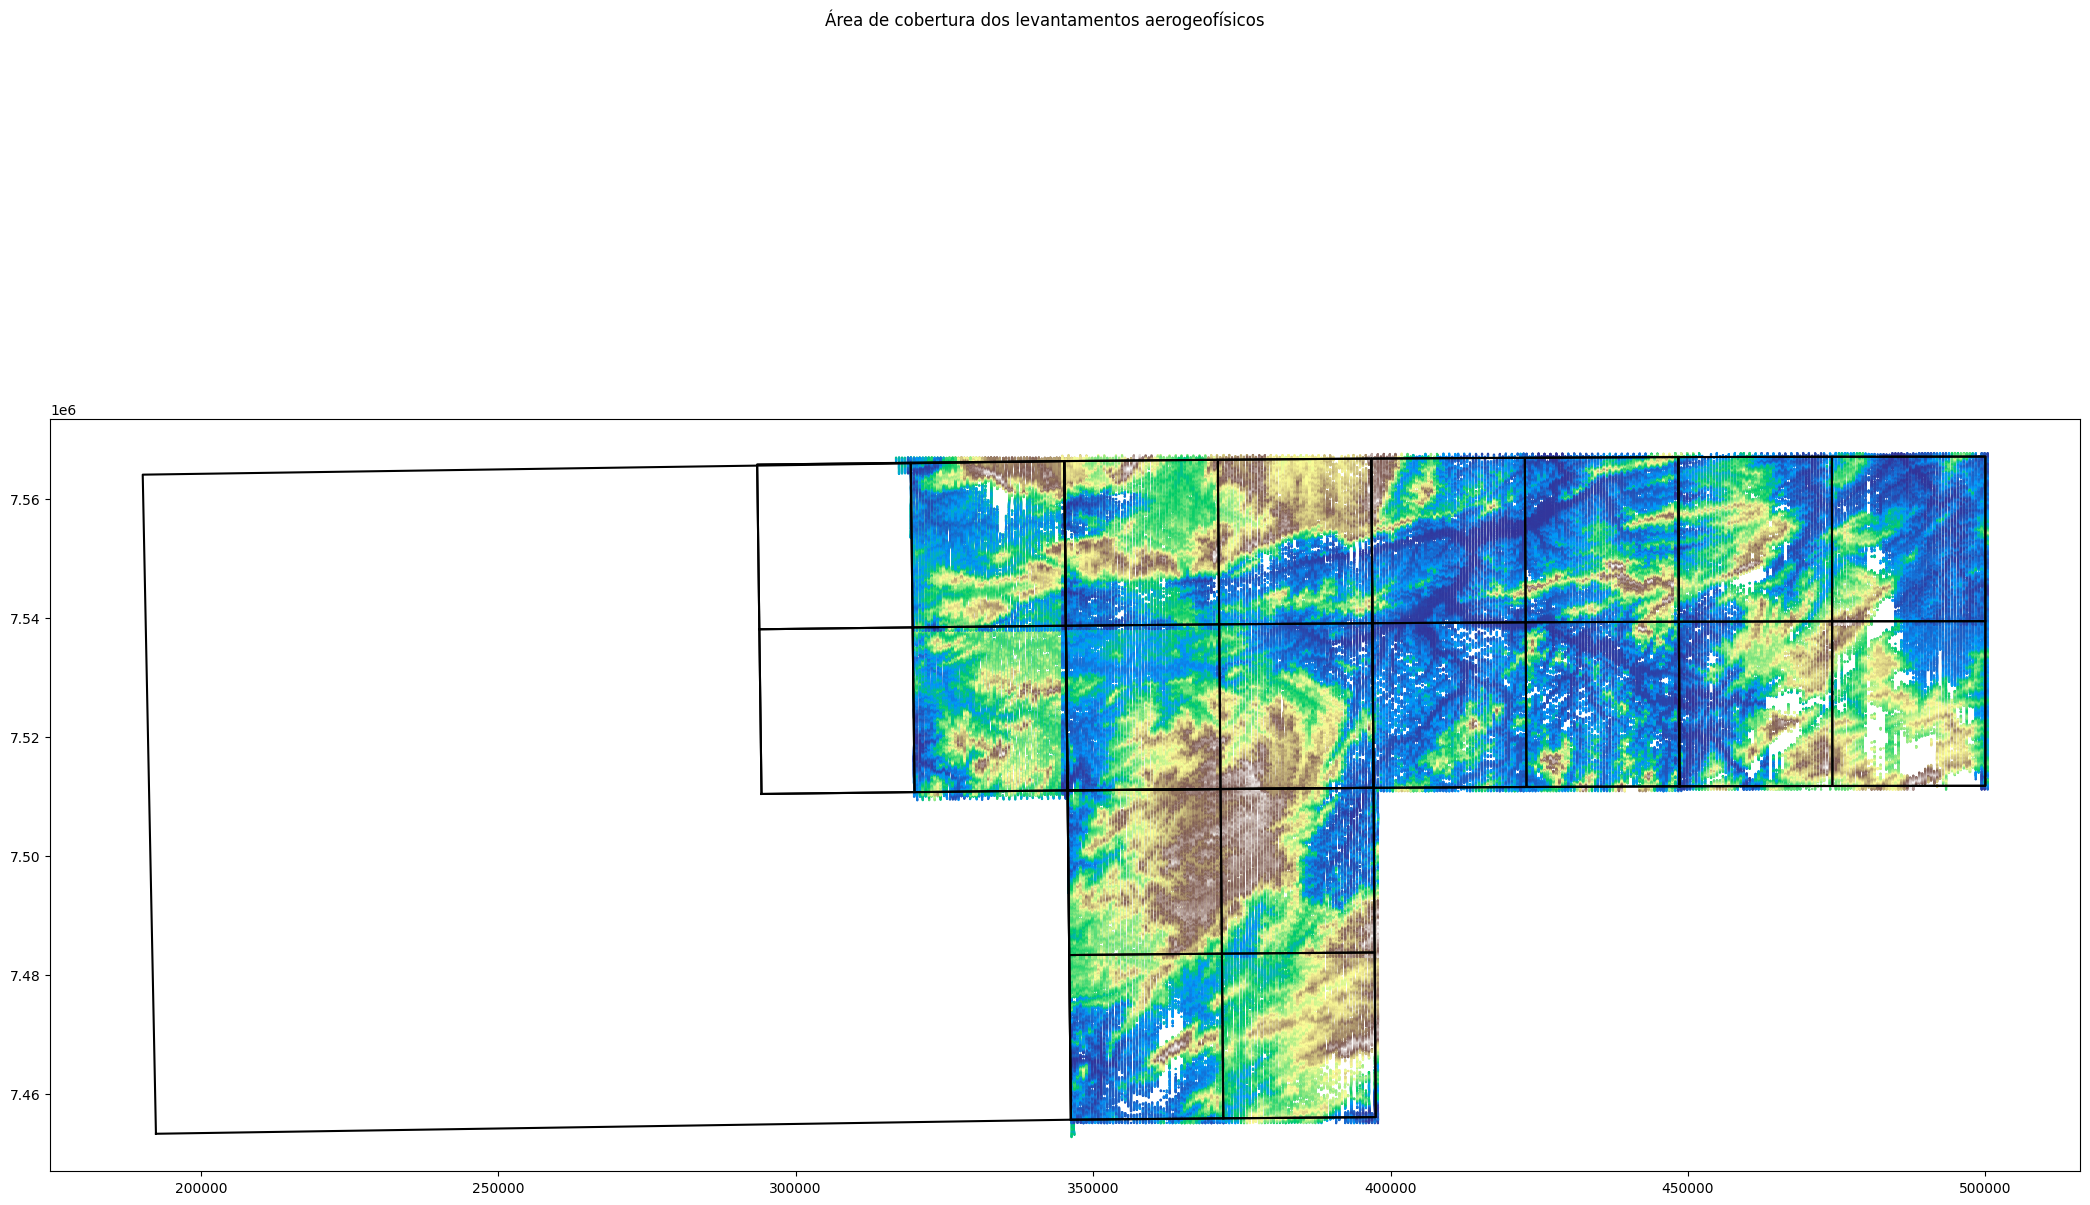

In [10]:
plt.figure(figsize=(21,16))
for id in list(quadricula.keys()):
    carta=quadricula[id]
    folha_utm=transform_to_carta_utm(carta['folha'])
    plt.plot(*folha_utm.exterior.xy,color='black')
    #plt.annotate(str(id),xy=folha_utm.centroid.coords[0],textcoords=folha_utm.centroid.coords[0])
    for data in list(carta.keys())[2:]:
        if 'mag' in data:
            pass
        else:
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].MDT,cmap='terrain',s=0.5,marker='H')
            plt.axis('scaled')
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.tight_layout()

## Visualizando dados Radiométricos Brutos

### Projeto 3022

In [11]:
plot_histograms(gama_3022)

NameError: name 'gama_3022' is not defined

In [ ]:
plot_raw_gama_data(gama_3022,suptitle='Dados Radiométricos brutos (Gama_3022.XYZ)')

#### Removendo valores negativos

In [ ]:
gama_3022_positive = remove_negative_values(gama_3022)

In [ ]:
plot_boxplots(gama_3022_positive,gama_FEAT)

In [ ]:
plot_histograms(gama_3022_positive)

In [ ]:
plot_raw_gama_data(gama_3022_positive,'Dados radiométricos tratadas : value <= 0 == 0.001')

### Projeto 1039

In [ ]:
gama_1039.rename(columns={'CTC':'CTCOR','KC':'KPERC','UC':'eU','THC':'eTh'},inplace=True)

In [ ]:
gama_1039_positive=remove_negative_values(gama_1039,lista=['X','Y','LATITUDE','LONGITUDE','geometry'])

gama_1039_positive['UTHRAZAO']=gama_1039_positive['eU']/gama_1039_positive['eTh']
gama_1039_positive['UKRAZAO']=gama_1039_positive['eU']/gama_1039_positive['KPERC']
gama_1039_positive['THKRAZAO']=gama_1039_positive['eTh']/gama_1039_positive['KPERC']

In [ ]:
plot_boxplots(gama_1039,gama_FEAT)

In [ ]:
plot_histograms(gama_1039)

In [ ]:
plot_histograms(gama_1039_positive)

In [ ]:
plot_raw_gama_data(gama_1039,suptitle='Dados Radiométricos brutos (XYZ)',orientation='vertical')

In [ ]:
plot_histograms(gama_1039_positive)
plot_raw_gama_data(gama_1039_positive,'Dados radiométricos tratadas : value <= 0 == 0.001')

### Projeto 1105

In [ ]:
plot_boxplots(gama_1105,gama_FEAT)

In [ ]:
plot_histograms(gama_1105)

In [ ]:
plot_raw_gama_data(gama_1105,suptitle='DADOS AEROGAMAESPECTROMÉTRICO')

In [ ]:
gama_1105_positive = remove_negative_values(gama_1105)

In [ ]:
plot_histograms(gama_1105_positive)

In [ ]:
plot_boxplots(gama_1105_positive,gama_FEAT)

In [ ]:
plot_raw_gama_data(gama_1105_positive,'Dados radiométricos tratadas : value <= 0 == 0.001')

# Removendo valores negativos das contagens radiométricas

## CONSTRUINDO UM GRID SINTÉTICO

In [ ]:
# REMOVING PART OF THE SINTETIC GRID
'''
df_xu_yu = pd.DataFrame(np.array([xu,yu]))
df_xu_yu=df_xu_yu.T
df_xu_yu.rename(columns={0:'xu',1:'yu'},inplace=True)

df_xu_yu[(df_xu_yu.xu < 540937) & (df_xu_yu.yu > 8866937)]

df_xu_yu.drop(df_xu_yu[(df_xu_yu.xu < 540937) & (df_xu_yu.yu > 8866937)].index,inplace=True)
plt.figure(figsize=(18,12))

plt.scatter(df_xu_yu.xu,df_xu_yu.yu,s=0.1,marker='.')
plt.axis('scaled')
'''

# Interpolação dos dados Brutos

## Método Cúbico

In [ ]:
# Test de área

# area=(344093.45426573796, 396417.36691108724, 7621768.799495494, 7677527.304557458)
# int((area[3]-area[2])/100),int((area[1]-area[0])/100)

In [ ]:
#traditional_interpolation(quadricula,'mag_3022','gama_3022','cubic','geof_3022')

In [ ]:
#list(quadricula['SF23_VC'].keys())

In [ ]:

#df = quadricula['SF23_VC']['geof_3022_cubic']
#plt.figure(figsize=(12,12))
#plt.scatter(x=df.X,y=df.Y,c=df.GMT,cmap='rainbow')
#plt.axis('scaled')

In [ ]:
# Print the output. a=

#descript_cubic = df.describe(percentiles)
#descript_cubic[['eU','eTh','KPERC','CTCOR','UTHRAZAO','THKRAZAO','UKRAZAO']].T

In [ ]:
#plot_histograms(geof_1089_cubic,suptitle='Distribuição dos dados radiométricos interpolados (cúbico, pixel 100m)')
#plot_raw_data(geof_1089_cubic,suptitle='Dados radiométricos interpolados (cúbico, pixel 100m)')

## Método Nearest

In [ ]:
#plot_histograms(geof_1089_nearest,suptitle='Distribuição dos dados radiométricos interpolados (nearest, pixel 100m)')

In [ ]:
#plot_raw_data(geof_1089_nearest,suptitle='Dados radiométricos interpolados (nearest, pixel 100m)')

## Método Linear

In [ ]:
#traditional_interpolation(quadricula,'mag_3022','gama_3022','linear','geof_3022')

In [ ]:
traditional_interpolation(quadricula,'mag_line_1105','gama_line_1105','linear','geof_1105')

In [ ]:
plt.figure(figsize=(24,16))

# PLOTANDO A MALHA CARTOGRÁFICA
for id in list(quadricula.keys()):
    carta=quadricula[id]
    plt.plot(*transform_to_carta_utm(carta['folha']).exterior.xy,color='black')
    
    # PLOTANDO OS DADOS INTERPOLADOS
    for data in list(carta.keys())[2:]:        
        if 'geof' in data:
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].eU,cmap='rainbow',s=0.5,marker='H')
            plt.axis('scaled')
        # SE NÃO TIVER DADOS NÃO PLOTA NADA
        else:
            pass
        
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.tight_layout()

In [ ]:
traditional_interpolation(quadricula,'mag_1039','gama_1039','linear','geof_1039')

In [ ]:
carta[data]

In [ ]:
plt.figure(figsize=(24,16))

for id in list(quadricula.keys()):
    carta=quadricula[id]
    plt.plot(*transform_to_carta_utm(carta['folha']).exterior.xy,color='black')
    
    for data in list(carta.keys())[2:]:
        if 'geof' in data:
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].MDT,cmap='terrain',s=0.5,marker='H')
            plt.axis('scaled')
        else:
            pass
        
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.tight_layout()


# Classificações Não-Supervisionadas

## Self-organizing maps (SOM)

In [ ]:
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn_som.som import SOM

### SF23_YA_III2

In [ ]:
SF23_YA_III2 = quadricula['SF23_YA_III2']['geof_1105_linear']
plot_histograms(SF23_YA_III2)

plot_boxplots(SF23_YA_III2,gama_FEAT)

In [ ]:
plot_raw_gama_data(SF23_YA_III2,suptitle='Dados Radiométricos interpolados (Algoritmo: Linear)',figsize=(27,16))

In [ ]:
SF23_YA_III2.rename(columns={'GMT':'MAGIGRF'},inplace=True)
plot_raw_mag_data(SF23_YA_III2,suptitle='Dados Magnetométricos interpolados (Algoritmo: Linear)')

In [ ]:
def plot_corr(dataframe, size=10):
    plt.figure(figsize = (size+size*0.2, size), facecolor='w')
    corrMatrix = dataframe.corr()
    sns.heatmap(np.round(corrMatrix,2), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f")
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0, ha='right')

In [ ]:
#SF23_YA_III2.rename(columns={'X':'E_utm','Y':'N_utm'},inplace=True)
#df_rs.fillna(0,inplace=True)

In [ ]:
xpixel_size = (SF23_YA_III2.X.max()-SF23_YA_III2.X.min())/SF23_YA_III2.X.unique().size
ypixel_size = (SF23_YA_III2.Y.max()-SF23_YA_III2.Y.min())/SF23_YA_III2.Y.unique().size
print('x:', xpixel_size, 'y:', ypixel_size)

nx=SF23_YA_III2.X.unique().size
ny=SF23_YA_III2.Y.unique().size
ratio=ny/nx
xs = SF23_YA_III2.X.values.reshape(ny, nx)
ys = SF23_YA_III2.Y.values.reshape(ny, nx)

features = list(SF23_YA_III2.columns[2:])

plot_corr(SF23_YA_III2[features], size=11)
#plt.savefig('figs/correlation_matrix.png', dpi=400, bbox_inches='tight')

In [ ]:
data = StandardScaler().fit_transform(SF23_YA_III2[features].values)

# data = df_rs[features].values

# NÚMERO DE CLASSES
n_clusters=11
lito_SOM = SOM(m=n_clusters,
               n=1,
           sigma=1.5,
             dim=len(features),
        max_iter=10000)

lito_SOM.fit(data)

# predição de classes
predictions = lito_SOM.predict(data)

In [ ]:
# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']
    
# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights, cmap="coolwarm")
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='vertical')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
import matplotlib.patches as mpatches


In [ ]:
id_ = [1,2,3,4,5,6,7,8,9,10,11]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)

idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)

datafig, ax=plt.subplots(figsize=(12, 12), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())

cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',cmap='viridis',ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)

patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(n_clusters)]
plt.legend(handles=patches, title="Legenda", title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='11')



plt.suptitle('SOM - Aerogeophysical Data (SF23_YA_III4)')
plt.axis('scaled')
plt.tight_layout()

plt.subplots_adjust(right=0.9)

plt.show()


### SF23_YA_III4

In [ ]:
df = quadricula['SF23_YA_III2']['geof_1105_linear']
plot_histograms(df)

In [ ]:
plot_raw_gama_data(df,suptitle='Dados Radiométricos interpolados (Algoritmo: Linear)',figsize=(27,16))
df.rename(columns={'GMT':'MAGIGRF'},inplace=True)
plot_raw_mag_data(df,suptitle='Dados Magnetométricos interpolados (Algoritmo: Linear)')

### Pixel size

In [ ]:
df_rs = df
#df_rs.rename(columns={'X':'E_utm','Y':'N_utm'},inplace=True)
#df_rs.fillna(0,inplace=True)

In [ ]:
xpixel_size = (df_rs.X.max()-df_rs.X.min())/df_rs.X.unique().size
ypixel_size = (df_rs.Y.max()-df_rs.Y.min())/df_rs.Y.unique().size
print('x:', xpixel_size, 'y:', ypixel_size)

nx=df_rs.X.unique().size
ny=df_rs.Y.unique().size
ratio=ny/nx
xs = df_rs.X.values.reshape(ny, nx)
ys = df_rs.Y.values.reshape(ny, nx)

features = list(df_rs.columns[2:])

plot_corr(df_rs[features], size=11)
#plt.savefig('figs/correlation_matrix.png', dpi=400, bbox_inches='tight')

In [ ]:
data = StandardScaler().fit_transform(df[features].values)

# data = df_rs[features].values

# NÚMERO DE CLASSES
n_clusters=5
lito_SOM = SOM(m=n_clusters,
               n=1,
           sigma=1.5,
             dim=len(features),
        max_iter=10000)

lito_SOM.fit(data)

# predição de classes
predictions = lito_SOM.predict(data)

# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']
    
# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
id_ = [1,2,3,4,5]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)

idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)

datafig, ax=plt.subplots(figsize=(12, 12), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())

cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',cmap='viridis',ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)

patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(n_clusters)]
plt.legend(handles=patches, title="Legenda", title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='11')

patches
plt.suptitle('SOM - Aerogeophysical Data (SF23_YA_III4)')
plt.axis('scaled')
plt.tight_layout()
plt.show()


In [ ]:
data = StandardScaler().fit_transform(df[features].values)

# data = df_rs[features].values

# NÚMERO DE CLASSES
n_clusters=20
lito_SOM = SOM(m=n_clusters,
               n=1,
           sigma=1.5,
             dim=len(features),
        max_iter=10000)

lito_SOM.fit(data)

# predição de classes
predictions = lito_SOM.predict(data)

# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']
    
# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='vertical')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
matplotlib.cm.tab20c

In [ ]:
id_ = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
relcolor =  matplotlib.cm.tab20c
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)

idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)

datafig, ax=plt.subplots(figsize=(12, 12), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())

cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',cmap='viridis',ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)

patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(n_clusters)]
plt.legend(handles=patches, title="Legenda", title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='11')

patches
plt.suptitle('SOM - Aerogeophysical Data (SF23_YA_III4)')
plt.axis('scaled')
plt.tight_layout()
plt.show()


In [ ]:
n_clusters=3
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=10000)
lito_SOM.fit(data)

# predição de classes
predictions = lito_SOM.predict(data)

# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']
    
# classes weights
fig, ax = plt.subplots(figsize=(27,27))
im=ax.matshow(lito_SOM.weights)

for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=8)
plt.xticks(range(len(features)), features, rotation=55, fontsize=9, ha='left')
fig.colorbar(im, label='weights', orientation='vertical',cmap='Reds')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
id_ = [0,1,2]

relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)

idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)

datafig, ax=plt.subplots(figsize=(12, 12), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)

patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(n_clusters)]
plt.legend(handles=patches, title="Legenda", title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='11')


cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
plt.suptitle('SOM - Aerogeophysical Data ()')
plt.axis('scaled')
plt.show()

### Testes

In [ ]:
quadricula.keys()

In [ ]:
plt.figure(figsize=(24,16))

# PLOTANDO A MALHA CARTOGRÁFICA
for id in list(quadricula.keys()):
    carta=quadricula[id]
    plt.plot(*transform_to_carta_utm(carta['folha']).exterior.xy,color='black')
    
    # PLOTANDO OS DADOS INTERPOLADOS
    for data in list(carta.keys())[2:]:        
        if 'geof' in data:
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].UTHRAZAO,cmap='rainbow',s=0.5,marker='H')
            plt.axis('scaled')
        # SE NÃO TIVER DADOS NÃO PLOTA NADA
        else:
            pass
        
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.tight_layout()

In [ ]:
df = quadricula['SF23_YA_III4']['geof_1105_linear']

plot_histograms(df)
plot_raw_gama_data(df,suptitle='Dados Radiométricos interpolados (Algoritmo: Linear)',figsize=(27,16))
#plot_raw_mag_data(df,suptitle='Dados Magnetométricos i4nterpolados (Algoritmo: Linear)')


df_rs = df
#df_rs.rename(columns={'X':'E_utm','Y':'N_utm'},inplace=True)
#df_rs.fillna(0,inplace=True)


xpixel_size = (df_rs.X.max()-df_rs.X.min())/df_rs.X.unique().size
ypixel_size = (df_rs.Y.max()-df_rs.Y.min())/df_rs.Y.unique().size
print('x:', xpixel_size, 'y:', ypixel_size)


nx=df_rs.X.unique().size
ny=df_rs.Y.unique().size
ratio=ny/nx
xs = df_rs.X.values.reshape(ny, nx)
ys = df_rs.Y.values.reshape(ny, nx)

features = list(df_rs.columns[2:])
print(features)


plot_corr(df_rs[features], size=12)
#plt.savefig('figs/correlation_matrix.png', dpi=400, bbox_inches='tight')

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(df[features].values)
# data = df_rs[features].values


n_clusters=2
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=50000)
lito_SOM.fit(data)

# predição de classes
predictions = lito_SOM.predict(data)

# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']
    
# classes weights
fig, ax = plt.subplots(figsize=(13,9))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(19, 26)
plt.show()

In [ ]:
nx

In [ ]:
id_ = [0,1]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)



idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)

datafig, ax=plt.subplots(figsize=(16, 16), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
plt.suptitle('SOM - Aerogeophysical Data (SF23_YA_III4)')
plt.axis('scaled')
plt.show()

# Classificações Supervisionadas

## Rotulando amostras com classes litológicas

In [ ]:
import shapely.speedups
from shapely import geometry
shapely.speedups.enable()

geof_1089_linear['geometry'] = [geometry.Point(x,y) for x, y in zip(geof_1089_linear['X'], geof_1089_linear['Y'])]
gdf_1089_linear = geof_1089_linear.set_geometry('geometry')

gdf_1089_linear.set_crs('EPSG:32723',inplace=True)
gdf_1089_linear.geometry

In [ ]:
Upload_litologia(quadricula,'litologia_100k')

In [ ]:
litologia=quadricula['SB24_ZB_II']['litologia_100k']
litologia.to_crs('EPSG:32724',inplace=True)
print(litologia.crs)
litologia.reset_index(drop=True,inplace=True)

dic_litologico = describe_geologico(litologia)
print(litologia.columns)

In [ ]:
print(dic_litologico['SIGLA']['len'])
print(dic_litologico['SIGLA']['lista'])
gdf_1089_linear

In [ ]:
litologia.plot('SIGLA',figsize=(16,16),legend=True)

In [ ]:
geof_1089_linear['closest_unit'] = geof_1089_linear['geometry'].apply(lambda x: litologia['SIGLA'].iloc[litologia.distance(x).idxmin()]) # .idxmin() Retorna o indice do menor valor 

In [ ]:
geof_1089_linear.to_csv('/home/ggrl/database/csv/SB24_ZB_II_gama_linear_100m.csv',index=False)